# Hotelling $T^2$

In [98]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM

## Using Hotelling $T^2$ to test Two Mean Differnece using data with repeated measures

Consider that case where the research uestion is comparing `Drug2` to `Drug4` and `Drug5`.

$H_0 = \mu2 - \mu4 = 0$ and $\mu2 - \mu5 = 0$

$H_a$ = at least one difference is not different from zero

Hotelling $T^2$ evaluates whether we can reject at least one of the null hypothesis $H_0$

In [58]:
drug = pd.read_csv("./drug.txt", sep='\t')
drug

,subj,drug1,drug2,drug3,drug4,drug5
0,1,31,29,17,32,25
1,2,15,17,11,20,24
2,3,25,21,19,28,35
3,4,35,35,21,42,30
4,5,27,27,15,28,25


In [59]:
drug['diff1'] = drug.drug2 - drug.drug4
drug['diff2'] = drug.drug2 - drug.drug5

In [60]:
drug[['diff1','diff2']].describe().T

,count,mean,std,min,25%,50%,75%,max
diff1,5.0,-4.2,2.683282,-7.0,-7.0,-3.0,-3.0,-1.0
diff2,5.0,-2.0,8.215838,-14.0,-7.0,2.0,4.0,5.0


__Correlation between two sets fo differences__

In [61]:
drug[['diff1','diff2']].corr()

,diff1,diff2
diff1,1.000000,0.317526
diff2,0.317526,1.000000


In [62]:
# diff 1
diff1_mu = drug.diff1.mean()
diff1_std = drug.diff1.std()
diff1_SE = diff1_std/np.sqrt(len(drug))
t1 = diff1_mu / diff1_SE

print("---------DIFF 1 ----------")
print("Average  in Diff 1:       ", diff1_mu)
print("Variance in Diff 1:       ", round(diff1_std, 2))
print("SE (s/sqrt(5)) in Diff 1: ", diff1_SE)
print("t_1 Avg delta/SE:         ", round(t1, 2))

# diff 2
diff2_mu = drug.diff2.mean()
diff2_std = drug.diff2.std()
diff2_SE = diff2_std/np.sqrt(len(drug))
t2 = diff2_mu / diff2_SE

print("")
print("---------DIFF 3 ----------")
print("Average  in Diff 2:       ", diff2_mu)
print("Variance in Diff 2:       ", round(diff2_std, 2))
print("SE (s/sqrt(5)) in Diff 2: ", round(diff2_SE, 2))
print("t_1 Avg delta/SE:         ", round(t2, 2))

coor_r = drug[['diff1','diff2']].corr()['diff2'][0]
coor_r

print("")
print("correlation r : ", coor_r)

---------DIFF 1 ----------
Average  in Diff 1:        -4.2
Variance in Diff 1:        2.68
SE (s/sqrt(5)) in Diff 1:  1.2
t_1 Avg delta/SE:          -3.5

---------DIFF 3 ----------
Average  in Diff 2:        -2.0
Variance in Diff 2:        8.22
SE (s/sqrt(5)) in Diff 2:  3.67
t_1 Avg delta/SE:          -0.54

correlation r :  0.3175264481385601


### Hotellings $T^2$

$T^2 = \frac{t_1^2 + t_2^2 - 2rt_1t_2}{1 - r^2}$

F statistics

$f = \frac{n-2}{2(n-1)}T^2$

where:
$df 2, n-2$

In [63]:
t = (t1**2+t2**2 - 2*coor_r)/(1-coor_r**2)
print("Hotelling T2: ", round(t,3))

f = t*3/(2*4)
print("F-statistic: ", round(f,3))

Hotelling T2:  13.247
F-statistic:  4.968


---

In [ ]:


drug = pd.read_csv("./drug.txt", sep='\t')
drug_ = drug[['drug1','drug2','drug3','drug4','drug5']]
drug_

___Graph of Repeated Measure Data With One Group!___

C:\Users\phhale\AppData\Local\Continuum\anaconda3\envs\bril\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


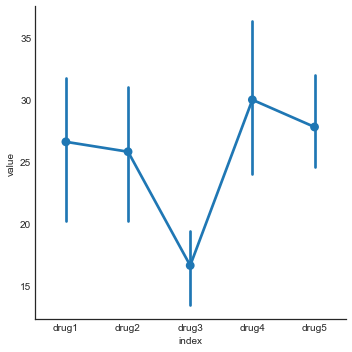

In [89]:
df_ = pd.melt(drug_.T.reset_index(), id_vars=['index'], var_name='subj')
df_.head()
sns.factorplot(x='index', y='value',data=df_, )

In [90]:
df_.head()

,index,subj,value
0,drug1,0,31
1,drug2,0,29
2,drug3,0,17
3,drug4,0,32
4,drug5,0,25


__THIS IS INCORRECT IF YOU HAVE REPEATED MEASURES__

One way anova ignoring repeated measure:

In [96]:
model = ols('value ~ index', data=df_).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
index,529.76,4.0,3.20678,0.03458
Residual,826.00,20.0,NaN,NaN


### One Way ANOVA Condiering Repeated Measures

using `statsmodels`, the arguments are:
- `df_` is the dataset
- `value` is the independent variable
- `subj` is the subject identifier
- `within=index` is the list od dependend variables

Then we print the ANOVA Table.

In [107]:
aovrm = AnovaRM(df_, 'value', 'subj', within=['index'])
res = aovrm.fit()

print(res)

               Anova
      Num DF  Den DF F Value Pr > F
-----------------------------------
index 4.0000 16.0000  9.1401 0.0005



Above is the __Repeated measures ANOVA for unitivatei test for within each drug__